In [2]:
from matplotlib import pyplot as plt
import numpy as np

## Método de Euler Mejorado o método de Heun o RK2

Corresponde a modificación del método de Euler y se consigue integrando la ecuación diferencial
$y'=f(x,y)$ entre $x_i$ y $x_{i+1}$:

$$  \int_{x_i}^{x_{i+1}} y'(x) dx = \int_{x_i}^{x_{i+1}} f(x,y(x)) dx $$

donde la integral de la izquierda se puede integrar directamente y la de la derecha aproximar mediante la regla del trapecio

$$ y(x_{i+1})-y(x_{i}) = \frac{h}{2} \left[ f(x_i , y(x_i)) + f(x_{i+1}, y(x_{i+1})) \right] $$

Despejando 

$$ y(x_{i+1}) = y(x_{i})+\frac{h}{2} \left[ f(x_i , y(x_i)) + f(x_{i+1}, y(x_{i+1})) \right] $$

es decir,

$$ y_{i+1} = y_i+\frac{h}{2} \left[ f(x_i , y_i) + f(x_{i+1}, y_i +h f(x_i,y_i)) \right] $$



## Algoritmo

Para el problema 
$$ y'=f(x,y) \quad ; \quad y(x_0)=y_0 $$

el algoritmo asociado al método de Euler está dado por:
    
Para $i=0,1, ... , n-1$ realizar <br>
*    $ x_i = x_0+ih $ <br>
*    $y_{i+1}^*= y_i +h f(x_i , y_i) $ <br>
*    $y_{i+1} = y_i + \dfrac{h}{2} \left[ f(x_i , y_i) + f(x_{i+1}, y_{i+1}^*) \right] $ <br>

Fin

## Ejercicio:

* a)  Elabore una función en Python que permita encontrar una aproximación de $y(x_n)$ utilizando el método de Euler mejorado, para el problema de valores iniciales general

$$ y'(x)=f(x,y) \quad , \quad y(x_0)=y_0$$

dados los datos de entrada $f(x,y), x_0, x_n, y_0, n$ (o $h$ en su defecto)

* b) Utilice el método de Euler mejorado para el problema de valores iniciales:

$$ y' = 0,2xy \quad ; \quad y(0) = 1$$

en el intervalo $[0, 4]$ usando h = 1, para aproximar $y(4)$.

* c) La solución explícita al PVI está dada por $y=e^{0,1x^2}$ (verifíquelo en otra ocasión). En un mismo gráfico grafique la solución real, junto con las aproximaciones encontradas con este método. A partir de los resultados del gráfico, determine si la aproximación encontrada es una buena aproximación. 

* d) Calcule el error cometido y compruebe si la respuesta dada en el item anterior es aceptable.

In [87]:
def metodo_euler(f, x0, xn, y0, n): 
    X = np.linspace(x0,xn,n+1)     
    Y = np.linspace(x0,xn,n+1)                 
    Y[0] = y0      
    h = (xn-x0)/n  
    for i in range(n):
        Y[i+1] = Y[i] + f(X[i],Y[i])*h
        print(X[i+1],Y[i+1])   
    ret = dict()
    ret['x'] = X
    ret['y'] = Y
    return ret    

In [3]:
# h = (xn-x0)/n
def RK2(f, x0, xn, y0, n): # Funcion, x0, xn, y0, n
    X = np.linspace(x0,xn,n+1)         
    Y = np.linspace(x0,xn,n+1)                 
    Y[0] = y0      
    h = (xn-x0)/n
    for i in range(n):
        Y[i+1] = Y[i] + (h/2)*(f(X[i],Y[i])+f(X[i+1],Y[i]+h*f(X[i],Y[i])))   
        print((Y[i+1]))

In [92]:
def f_1(x,y): return 0.2*x*y
RK2(f=f_1,x0=0,xn=4,y0=1,n=4)

{'x': array([0., 1., 2., 3., 4.]),
 'y': array([1.       , 1.1      , 1.474    , 2.38788  , 4.6324872])}

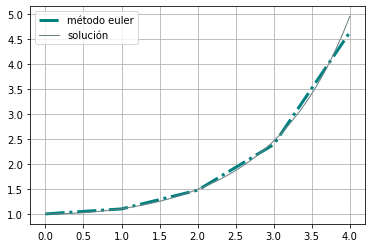

In [5]:
## Modificacion:
def RK2(f, x0, xn, y0, n): 
    X = np.linspace(x0,xn,n+1)         
    Y = np.linspace(x0,xn,n+1)                 
    Y[0] = y0      
    h = (xn-x0)/n      
    for i in range(n):
        Y[i+1] = Y[i] + (h/2)*(f(X[i],Y[i])+f(X[i+1],Y[i]+h*f(X[i],Y[i])))   
        #print(X[i+1],Y[i+1])
    ret = dict()
    ret['x'] = X
    ret['y'] = Y
    return ret
def f_1(x,y): return 0.2*x*y
def f(x): return np.exp(0.1*x**2)
solve = RK2(f_1, 0, 4, 1,4)
X = solve['x']
Y = solve['y'] 
x = np.linspace(0,4,100)
plt.plot(X, Y,linewidth=3, linestyle='-.', color=(0, 0.5 ,0.5), label='método euler')
plt.plot(x, f(x),linewidth=1, linestyle='-', color=(0.4, 0.5 ,0.5), label='solución')
plt.grid()
plt.legend()

In [6]:
Error = np.abs( np.exp(0.1*4**2) - Y[-1])
Error

0.32054522439511324

## Método de Runge Kutta de orden 4 (RK4)


Para el problema 
$$ y'=f(x,y) \quad ; \quad y(x_0)=y_0 $$

el algoritmo asociado al método RK4 está dado por:
    
Para $i=0,1, ... , n-1$ realizar <br>

*    $ x_i = x_0+ih $ <br>

*    $ K_1 = f(x_i,y_i) $ <br>

*    $ K_2 = f\left( x_i + \dfrac{h}{2} , y_i + \dfrac{h}{2} K_1 \right) $ <br>

*    $ K_3 = f\left( x_i + \dfrac{h}{2} , y_i + \dfrac{h}{2} K_2 \right) $ <br>

*    $ K_4 = f\left( x_i + h , y_i + h K_3 \right) $ <br>

*    $y_{i+1} = y_i + \dfrac{h}{6} \left[ K_1 + 2K_2 + 2K_3 + K_4 \right] $ <br>

Fin

## Ejercicio:

* a)  Elabore una función en Python que permita encontrar una aproximación de $y(x_n)$ utilizando el método de RK4 para el problema de valores iniciales general

$$ y'(x)=f(x,y) \quad , \quad y(x_0)=y_0$$

dados los datos de entrada $f(x,y), x_0, x_n, y_0, n$ (o $h$ en su defecto)

* b) Utilice el método de Euler mejorado para el problema de valores iniciales:

$$ y' = 0,2xy \quad ; \quad y(0) = 1$$

en el intervalo $[0, 4]$ usando h = 1, para aproximar $y(4)$.

* c) La solución explícita al PVI está dada por $y=e^{0,1x^2}$ (verifíquelo en otra ocasión). En un mismo gráfico grafique la solución real, junto con las aproximaciones encontradas con este método. A partir de los resultados del gráfico, determine si la aproximación encontrada es una buena aproximación. 

* d) Calcule el error cometido y compruebe si la respuesta dada en el item anterior es aceptable.

In [11]:
def RK4(f, x0, xn, y0, n):
    X = np.linspace(x0,xn,n+1)
    Y = np.linspace(x0,xn,n+1)                 
    Y[0] = y0        
    h = (xn-x0)/n     
    for i in range(n):
        K1=f(X[i],Y[i]) 
        K2=f(X[i]+h/2,Y[i]+(h/2)*K1) 
        K3=f(X[i]+h/2,Y[i]+(h/2)*K2) 
        K4=f(X[i]+h,Y[i]+h*K3)
        Y[i+1] = Y[i] +(h/6)*(K1+2*K2+2*K3+K4)
        #print(X[i+1],Y[i+1])
    coord = dict()
    coord['x'] = X
    coord['y'] = Y 
    return coord

==== Método de Euler Mejorado ====
==== Método RK4 ====


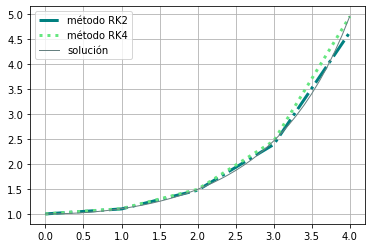

In [93]:
def f_1(x,y): return 0.2*x*y
print('==== Método de Euler Mejorado ====')
solve1 = RK2(f_1, 0, 4, 1,4)
X1 = solve1['x']
Y1= solve1['y'] 
print('==== Método RK4 ====')
solve2 = RK4(f_1, 0, 4, 1,4)
X2 = solve2['x']
Y2 = solve2['y'] 
x=np.arange(0,4.1,0.1)
y= np.exp(0.1*x**2)
plt.plot(X1, Y1,linewidth=3, linestyle='-.', color=(0, 0.5 ,0.5), label='método RK2')
plt.plot(X2, Y2,linewidth=3, linestyle=':', color=(0.4, 0.9 ,0.5), label='método RK4')
plt.plot(x, y,linewidth=1, linestyle='-', color=(0.4, 0.5 ,0.5), label='solución')
plt.grid()
plt.legend()

In [94]:
y = 4
Error_Euler_mejorado = np.abs(np.exp(0.1*y**2) - Y1[-1])
Error_Euler_mejorado 

0.32054522439511324

In [95]:
y = 4
Error_RK4 = np.abs(np.exp(0.1*y**2) - Y2[-1])
Error_RK4

0.00579191774961707

## Ejercicios adicionales

a) Utilice los métodos de Euler,  Euler mejorado y Runge Kutta para aproximar $y(0,5)$, donde $y(x)$ es la solución del PVI

$$ y' = 2xy^2 \quad ; \quad y(0) = 1.$$

Para ello utilice:
    * $h = 0,25$ 
    * $h= 0,1 $
    
b) Encuentre la solución explícita al PVI.

c) Grafique en un mismo plano, la solución explícita y cada una de las aproximaciones encontradas. Establezca a partir de éste, cuál de las tres aproximaciones es mejor.

d) Identifique, a partir del gráfico, cuál de los tres métodos tiene un error global más grande.

e) Calcule el error absoluto en cada método y concluya en base a estos resultados cuál es la mejor aproximación.

f) Repita el proceso (a)-(e) con los PVI

   * $ y' = 1+(x-y)^2 \quad ; \quad y(2)=1 $
   * $ y' - \dfrac{y}{x} = 1 \quad ; \quad y(1)=2 $

In [82]:
def f_1(x,y): return 2*x*(y**2)
print('==== Método de Euler Mejorado con h = 0.25 ====') # 0.25 = 0.5-0/n
solve1 = RK2(f_1, 0, 0.5, 1,2) 
X1 = solve1['x']
Y1 = solve1['y'] 
# sol Y1[-1]
print('==== Método RK4 ====')
solve2 = RK4(f_1, 0, 0.5, 1,2)
X2 = solve2['x']
Y2 = solve2['y']
# sol Y2[-1]
print('==== Método de Euler Mejorado con h = 0.1 ====') # 0.1 = 0.5-0/n
solve1 = RK2(f_1, 0, 0.5, 1,5) 
X1 = solve1['x']
Y1 = solve1['y'] 
# sol Y1[-1]
print('==== Método RK4 ====')
solve2 = RK4(f_1, 0, 0.5, 1,5)
X2 = solve2['x']
Y2 = solve2['y']
# sol Y2[-1]

==== Método de Euler Mejorado con h = 0.25 ====
==== Método RK4 ====
==== Método de Euler Mejorado con h = 0.1 ====
==== Método RK4 ====


In [ ]:
# Se calcula la solución del PVI
# y = 1/1-x**2 R-[-1;1]

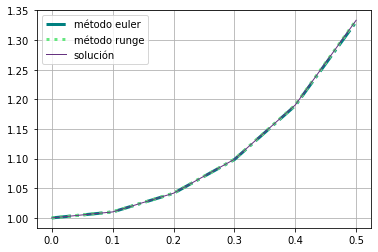

In [84]:
# SE grafica
x=np.arange(0,0.6,0.1)
y=1/(1-(x**2)) # Solucion explicita PVI E R-[-1;1]
plt.plot(X1, Y1,linewidth=3, linestyle='-.', color=(0, 0.5 ,0.5), label='método euler' )
plt.plot(X2, Y2,linewidth=3, linestyle=':', color=(0.4, 0.9 ,0.5), label='método runge' )
plt.plot(x, y,linewidth=1, linestyle='-', color=(0.4, 0.2 ,0.5), label='solución' )
# plt.axis([0.4,0.42,1.20,1.22]) # Zoom a la imagen
plt.grid()
plt.legend()

In [81]:
# Del gráfico no es posible identifricar cuál error global es más pequeño,
# es necesario hacer un analisis del error. Para ello basta hacer (por ejemplo)
# una modificación de los códigos de cada método:

In [62]:
x = 0.5 # x a aproximar
Error_Euler_mejorado = np.abs(1/(1-(x**2)) - Y1[-1])
Error_Euler_mejorado  

0.01919107635815931

In [63]:
Error_RK4 = np.abs( 1/(1-(x**2))  - Y2[-1])
Error_RK4

3.514568049345357e-05

In [76]:
# Como se puede apreciar la aproximacion de y(-0.5), viendo la grafica y calculando el erro absoluto 
# el error más pequeño cometido corresponde al metode Runge Kutta de Orden 4, por lo tanto se obtiene 
# una aproximación bastante cercana al valor real